In [1]:
#Load the librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

import plotly as tls
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings

from scipy import stats

%matplotlib inline

# figure size in inches
rcParams['figure.figsize'] = 12,6

In [2]:
pwd

'/home/labsuser/Capstone/RealEstate'

In [2]:
#Reading the dataset
input_ds = pd.read_csv('train.csv')

In [3]:
input_ds.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [4]:
input_ds.isnull().sum()

UID                0
BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          268
married          191
married_snp      191
separated        191
divorced         191
Length: 80, dtype: int64

In [5]:
input_ds.count()

UID            27321
BLOCKID            0
SUMLEVEL       27321
COUNTYID       27321
STATEID        27321
               ...  
pct_own        27053
married        27130
married_snp    27130
separated      27130
divorced       27130
Length: 80, dtype: int64

In [17]:
input_ds.isnull().sum().count

<bound method Series.count of UID              0
SUMLEVEL         0
COUNTYID         0
STATEID          0
state            0
              ... 
pct_own        268
married        191
married_snp    191
separated      191
divorced       191
Length: 79, dtype: int64>

In [3]:
input_ds.columns[input_ds.isnull().any()]

Index(['BLOCKID', 'rent_mean', 'rent_median', 'rent_stdev',
       'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15',
       'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40',
       'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female',
       'male_age_mean', 'male_age_median', 'male_age_stdev',
       'male_age_sample_weight', 'male_age_samples', 'female_age_mean',
       'female_age_median', 'female_age_stdev', 'female_age_samp

In [11]:
input_ds.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [4]:
half_count = len(input_ds) / 2

In [5]:
input_ds.dropna(thresh=half_count,axis=1,inplace=True)

In [23]:
input_ds.dtypes

UID              int64
SUMLEVEL         int64
COUNTYID         int64
STATEID          int64
state           object
                ...   
pct_own        float64
married        float64
married_snp    float64
separated      float64
divorced       float64
Length: 79, dtype: object

In [5]:
import plotly.express as px

In [41]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Choropleth(
    locations=input_ds['state_ab'], # Spatial coordinates
    z = input_ds['second_mortgage'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Second Mortgage",
))

fig.update_layout(
    title_text = 'House Mortgage',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [6]:
input_ds_secMortgage = input_ds.nlargest(2500, ['second_mortgage'])

In [7]:
input_ds = input_ds_secMortgage[input_ds_secMortgage['pct_own'] > 0.10]

In [8]:
input_ds.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
3285,289712,NaN,140,147,51,Virginia,VA,Farmville,Farmville,Town,...,19.58762,19.16667,4.00258,673.39577,1124.0,0.62069,0.03612,0.01806,0.01806,0.00000
11980,251185,NaN,140,27,25,Massachusetts,MA,Worcester,Worcester City,City,...,30.60147,26.16667,19.21553,262.09529,994.0,0.20247,0.37844,0.11976,0.09341,0.10539
26018,269323,NaN,140,81,36,New York,NY,Corona,Harbor Hills,City,...,29.80694,27.66667,18.45616,448.69061,1932.0,0.15618,0.44490,0.14555,0.02357,0.04066
7829,251324,NaN,140,3,24,Maryland,MD,Glen Burnie,Glen Burnie,CDP,...,32.53273,30.66667,19.61959,694.10357,2881.0,0.22380,0.58250,0.08321,0.00000,0.01778
2077,235788,NaN,140,57,12,Florida,FL,Tampa,Egypt Lake-leto,City,...,34.53924,28.58333,18.56943,814.45000,2684.0,0.11618,0.36953,0.12876,0.09957,0.07339


In [7]:
input_ds['bad_debt'] = input_ds['second_mortgage'] + input_ds['home_equity'] - input_ds['home_equity_second_mortgage']

In [6]:
input_ds['good_debt'] = input_ds['debt'] - input_ds['bad_debt']

In [29]:
input_ds['Good Depth'].head()

3285     0.00000
11980    0.41593
26018    0.38068
7829     0.49471
2077     0.40187
Name: Good Depth, dtype: float64

<AxesSubplot:ylabel='debt'>

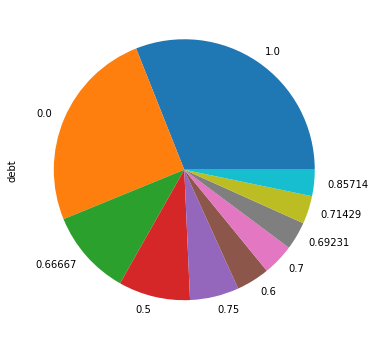

In [6]:
(input_ds['debt']).value_counts().head(10).plot.pie()

<AxesSubplot:ylabel='debt'>

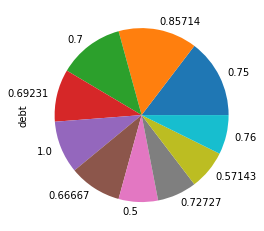

In [23]:
input_ds['debt'].value_counts().head(10).plot.pie()

In [18]:
state_count = input_ds["state"].value_counts()
city_count = input_ds.city.value_counts()
place_count = input_ds.place.value_counts()
primary_count = input_ds.primary.value_counts()

In [20]:
np.log(input_ds['ALand'] / 1000000)

3285    -0.883361
11980   -0.226694
26018   -1.773923
7829     0.104614
2077     0.718282
           ...   
3866     3.106802
14632    0.027565
16766    0.732388
18169   -0.847586
21931    1.799303
Name: ALand, Length: 2421, dtype: float64

In [11]:
city_count = input_ds.city.value_counts()

#First plot
trace0 = go.Box(
    x=input_ds[input_ds.city.isin(city_count[:10].index.values)]['city'],
    y=input_ds[input_ds.city.isin(city_count[:10].index.values)]['second_mortgage'], 
    showlegend=False
)

#Second plot
trace1 = go.Box(
    x=input_ds[input_ds.city.isin(city_count[:10].index.values)]['city'],
    y=input_ds[input_ds.city.isin(city_count[:10].index.values)]['home_equity'], 
    showlegend=False
)

#Second plot
trace2 = go.Box(
    x=input_ds[input_ds.city.isin(city_count[:10].index.values)]['city'],
    y=input_ds[input_ds.city.isin(city_count[:10].index.values)]['bad_debt'], 
    showlegend=False
)
#Third plot
trace3 = go.Box(
    x=input_ds[input_ds.city.isin(city_count[:10].index.values)]['city'],
    y=input_ds[input_ds.city.isin(city_count[:10].index.values)]['good_debt'], 
    showlegend=False
)

trace4 = go.Histogram(
    x=input_ds[input_ds.city.isin(city_count[:20].index.values)]['city'], histnorm='percent',
    showlegend=False
)

#Third plot
trace5 = go.Histogram(
    x=np.log(input_ds['hi_median']).sample(1000), histnorm='percent', autobinx=True,
    showlegend=True, name='Household Median'
)

#Third plot
trace6 = go.Histogram(
    x=np.log(input_ds['family_median']).sample(1000), histnorm='percent', autobinx=True,
    showlegend=True, name='Family Median'
)

#Third plot
trace7 = go.Histogram(
    x=np.log(input_ds['hc_mortgage_median']).sample(1000), histnorm='percent', autobinx=True,
    showlegend=True, name="Mortgage Median"
)

#Creating the grid
fig = tls.subplots.make_subplots(rows=2, cols=4, specs=[[{'colspan': 2}, None, {}, {}], [{}, {}, {}, {}]],
                          subplot_titles=("Citys Count",
                                          "Medians Distribuition", 
                                          "Second Mortgage",
                                          "Home Equity", 
                                          "Bad Debt",
                                         "Good Debt"))

#setting the figs
fig.append_trace(trace0, 2, 1)
fig.append_trace(trace1, 2, 3)
fig.append_trace(trace2, 2, 2)
fig.append_trace(trace3, 2, 4)
fig.append_trace(trace4, 1, 1)
fig.append_trace(trace5, 1, 3)
fig.append_trace(trace6, 1, 3)
fig.append_trace(trace7, 1, 3)

fig['layout'].update(showlegend=True, title="Some Top Citys Distribuitions")

iplot(fig)

In [7]:
input_ds['pop_density']=input_ds['pop']/input_ds['ALand']

In [9]:
input_ds['pop_density'].head()

0    0.000026
1    0.001687
2    0.000099
3    0.002442
4    0.002207
Name: pop_density, dtype: float64

In [10]:
sns.barplot( x=input_ds[input_ds.city.isin(city_count[:10].index.values)]['city'],
    y=input_ds[input_ds.city.isin(city_count[:10].index.values)]['pop_density'], )

NameError: name 'city_count' is not defined

In [21]:
input_ds[['male_pop','female_pop','male_age_median', 'female_age_median']]

,male_pop,female_pop,male_age_median,female_age_median
0,2612,2618,44.00000,45.33333
1,1349,1284,32.00000,37.58333
2,3643,3238,40.83333,42.83333
3,1141,1559,48.91667,50.58333
4,2586,3051,22.41667,21.58333
...,...,...,...,...
27316,909,938,41.66667,40.16667
27317,2116,2039,38.83333,39.50000
27318,1465,1364,42.00000,46.33333
27319,5727,5815,46.66667,43.41667


In [17]:
input_ds['median_age'] = (input_ds['male_age_median'] + input_ds['female_age_median'] )/2

In [23]:
input_ds['median_age'].head()

0    44.666665
1    34.791665
2    41.833330
3    49.750000
4    22.000000
Name: median_age, dtype: float64

In [44]:
input_ds["total_population"] = input_ds["male_pop"] + input_ds["female_pop"]

In [25]:
input_ds["total_population"].head()

0    5230
1    2633
2    6881
3    2700
4    5637
Name: total_population, dtype: int64

In [26]:
input_ds["total_population"].max()

53812

In [45]:
cut_bins = [10000, 20000, 30000, 40000, 50000]
input_ds['total_population1'] = pd.cut(input_ds['total_population'], bins=cut_bins)

In [42]:
sns.boxplot(x="total_population1", y="total_population", data=input_ds)

ValueError: Could not interpret input 'total_population1'

In [46]:
input_ds["married"] = input_ds['married'] * 10

In [47]:
input_ds["divorced"] = input_ds['divorced'] * 10

In [48]:
input_ds["separated"] = input_ds['separated'] * 10

In [60]:
plot_order = input_ds.sort_values(by='total_population1', ascending=False)

<AxesSubplot:xlabel='married', ylabel='total_population1'>

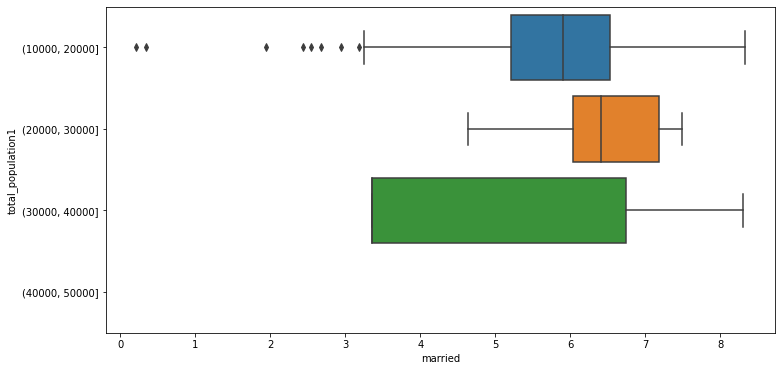

In [62]:
sns.boxplot(x="married", y="total_population1", data=input_ds)

<AxesSubplot:xlabel='married', ylabel='total_population1'>

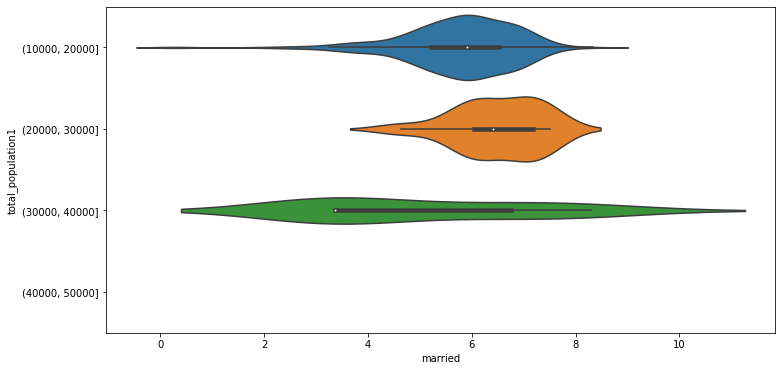

In [54]:
sns.violinplot(x="married", y="total_population1", data=input_ds)

<AxesSubplot:xlabel='divorced', ylabel='total_population1'>

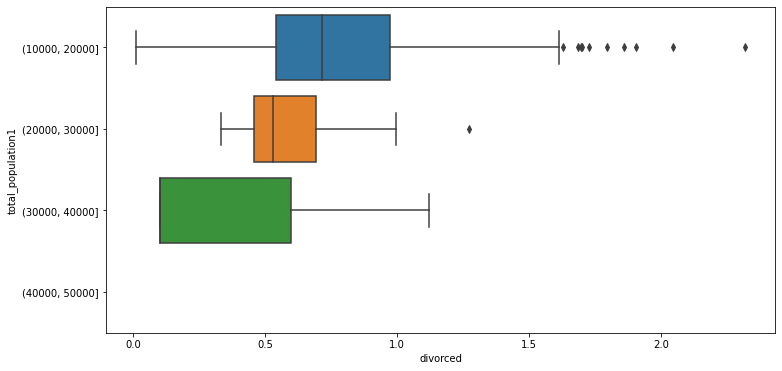

In [52]:
sns.boxplot(x="divorced", y="total_population1", data=input_ds)

<AxesSubplot:xlabel='divorced', ylabel='total_population1'>

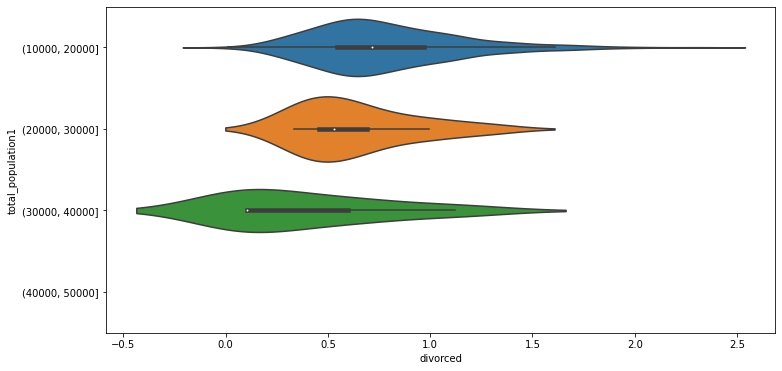

In [63]:
sns.violinplot(x="divorced", y="total_population1", data=input_ds)

<AxesSubplot:xlabel='separated', ylabel='total_population1'>

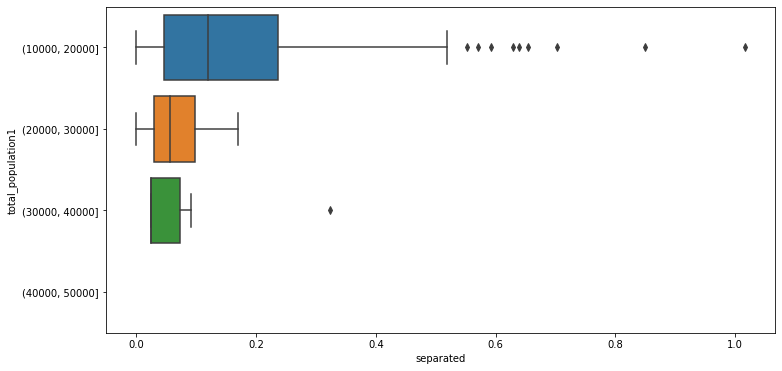

In [53]:
sns.boxplot(x="separated", y="total_population1", data=input_ds)

<AxesSubplot:xlabel='separated', ylabel='total_population1'>

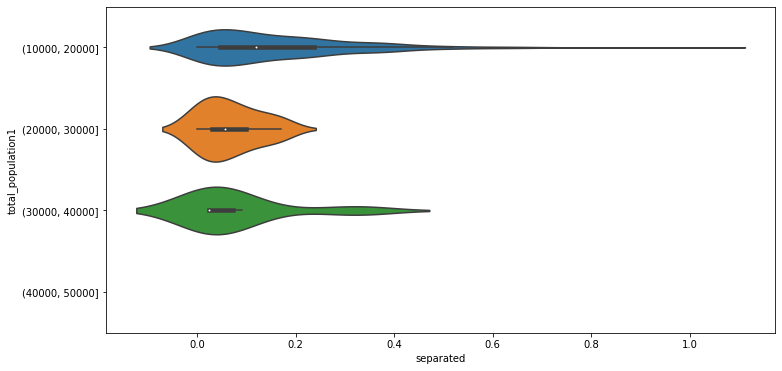

In [64]:
sns.violinplot(x="separated", y="total_population1", data=input_ds)

<AxesSubplot:xlabel='city', ylabel='hi_median'>

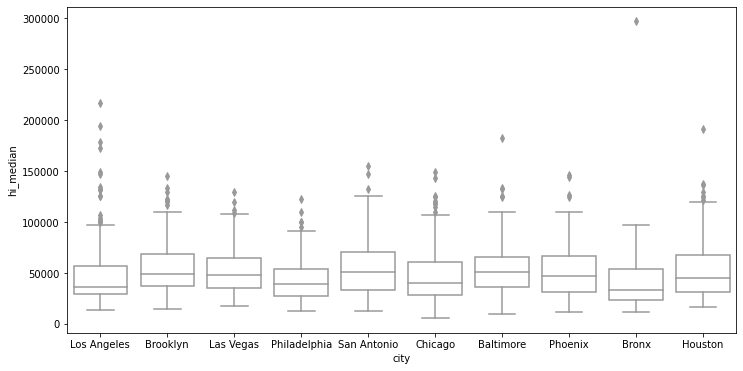

In [75]:
sns.boxplot(x=input_ds[input_ds.city.isin(city_count[:10].index.values)]['city'],
   y=input_ds[input_ds.city.isin(city_count[:10].index.values)]['hi_median'],  data=input_ds, color = 'White')

<AxesSubplot:xlabel='city', ylabel='rent_median'>

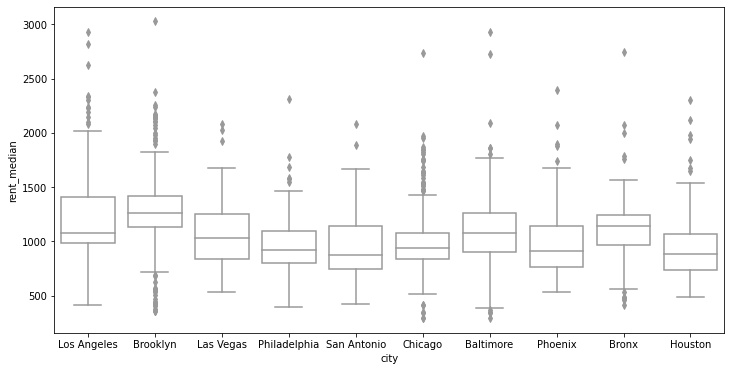

In [76]:
sns.boxplot(x=input_ds[input_ds.city.isin(city_count[:10].index.values)]['city'],
   y=input_ds[input_ds.city.isin(city_count[:10].index.values)]['rent_median'],  data=input_ds, color = 'White')

In [13]:
input_ds.columns

Index(['UID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city',
       'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30',
       'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight',
       'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples',
       'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage',
       'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf',
       'debt_cdf', 'hs_degree',

In [6]:
input_ds_corr = input_ds.loc[:,['rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'family_median', 'hc_mortgage_median', 'hc_median', 
                                'pop_density', 'married', 'married_snp','hs_degree','hs_degree_male', 'hs_degree_female','male_age_median','female_age_median','pct_own','second_mortgage', 'home_equity']]

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

<AxesSubplot:>

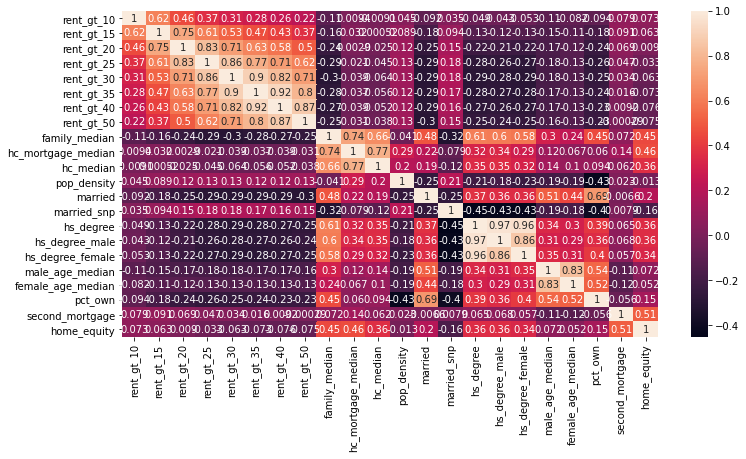

In [9]:
corr = input_ds_corr.corr()
sns.heatmap(corr, annot = True)

In [10]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

In [11]:
to_drop

['rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hc_mortgage_median',
 'hc_median',
 'hs_degree_male',
 'hs_degree_female',
 'female_age_median']

In [7]:
to_drop = ['rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'hc_mortgage_median',
 'hc_median',
 'hs_degree_male',
 'hs_degree_female',
 'female_age_median']

In [8]:
input_ds.drop(columns=to_drop, axis=0, inplace=True)

<AxesSubplot:>

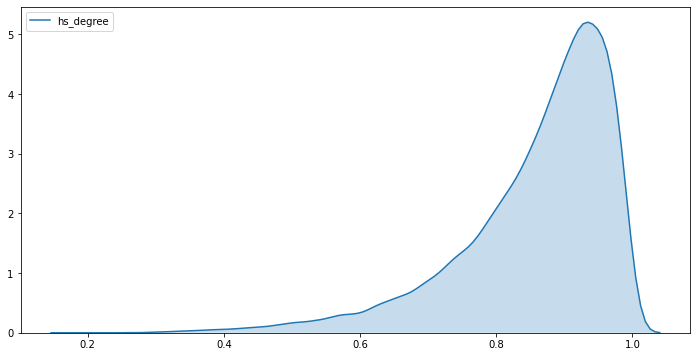

In [16]:
sns.kdeplot(input_ds['hs_degree'],shade='True')

<AxesSubplot:>

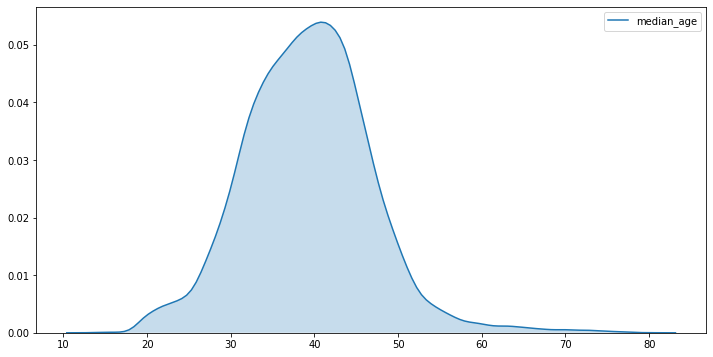

In [18]:
sns.kdeplot(input_ds['median_age'],shade='True')

<AxesSubplot:>

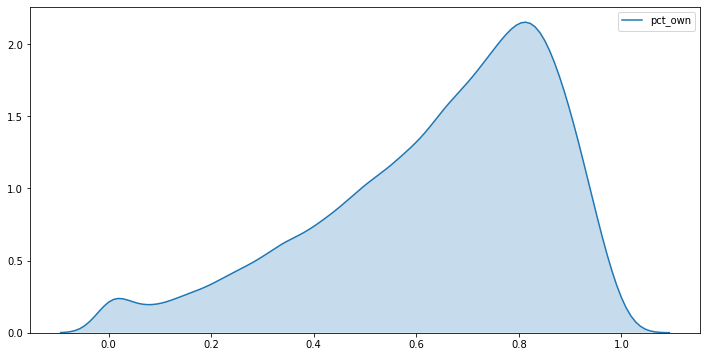

In [19]:
sns.kdeplot(input_ds['pct_own'],shade='True')

<AxesSubplot:>

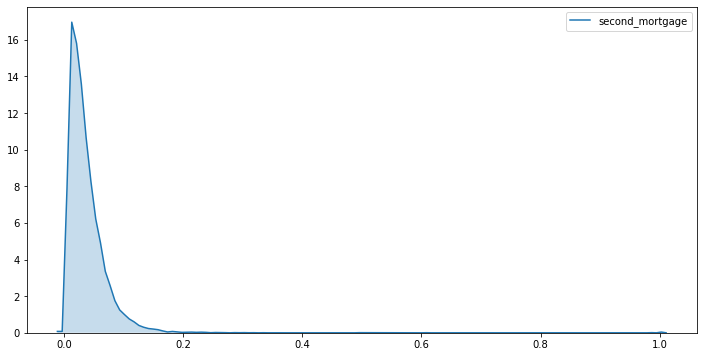

In [20]:
sns.kdeplot(input_ds['second_mortgage'],shade='True')

<AxesSubplot:>

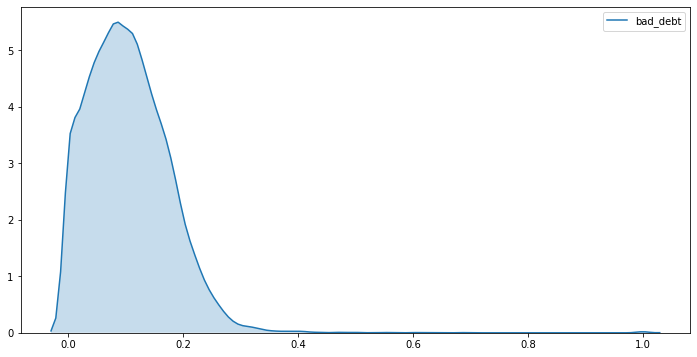

In [23]:
sns.kdeplot(input_ds['bad_debt'],shade='True')

<AxesSubplot:xlabel='second_mortgage', ylabel='pop_density'>

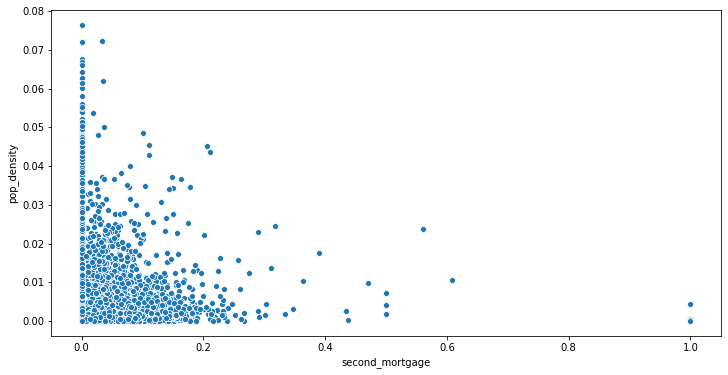

In [27]:
sns.scatterplot(x=input_ds['second_mortgage'], y=input_ds['pop_density'])

In [28]:
input_ds.isnull().sum()

UID                0
BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
separated        191
divorced         191
pop_density        0
median_age       213
bad_debt         457
Length: 83, dtype: int64

In [42]:
input_ds.columns

Index(['UID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city',
       'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'male_age_mean', 'male_age_median', 'male_age_stdev',
       'male_age_sample_weight', 'male_age_samples', 'fem

In [48]:
input_ds['hc_mortgage_mean'].isnull().sum()

0

In [9]:
input_ds.dropna(subset=['hc_mortgage_mean'],inplace=True)

In [50]:
input_ds['UID'].count()

26748

In [51]:
input_ds.isnull().sum()

UID            0
SUMLEVEL       0
COUNTYID       0
STATEID        0
state          0
              ..
separated      2
divorced       2
pop_density    0
median_age     1
bad_debt       0
Length: 72, dtype: int64

In [10]:
test_data = pd.read_csv('test.csv')

In [55]:
test_data.isnull().sum()

UID                0
BLOCKID        11709
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          122
married           84
married_snp       84
separated         84
divorced          84
Length: 80, dtype: int64

In [56]:
input_ds.columns

Index(['UID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city',
       'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'male_age_mean', 'male_age_median', 'male_age_stdev',
       'male_age_sample_weight', 'male_age_samples', 'fem

In [11]:
test_data = test_data.loc[:,['UID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city',
       'place', 'type', 'primary', 'zip_code', 'area_code', 'lat', 'lng',
       'ALand', 'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean',
       'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples',
       'rent_gt_10', 'rent_gt_15', 'rent_gt_50', 'universe_samples',
       'used_samples', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight',
       'hi_samples', 'family_mean', 'family_median', 'family_stdev',
       'family_sample_weight', 'family_samples', 'hc_mortgage_mean',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'male_age_mean', 'male_age_median', 'male_age_stdev',
       'male_age_sample_weight', 'male_age_samples', 'female_age_mean',
       'female_age_stdev', 'female_age_sample_weight', 'female_age_samples',
       'pct_own', 'married', 'married_snp', 'separated', 'divorced']]

In [17]:
input_ds.drop(columns=['pop_density', 'median_age', 'bad_debt'], axis = 0,inplace = True)

In [12]:
objList = test_data.select_dtypes(include = "object").columns
print (objList)

Index(['state', 'state_ab', 'city', 'place', 'type', 'primary'], dtype='object')


Now, to convert the above objList features into numeric type, you can use a forloop as given below

In [13]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    test_data[feat] = le.fit_transform(test_data[feat].astype(str))

print (test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   SUMLEVEL                     11709 non-null  int64  
 2   COUNTYID                     11709 non-null  int64  
 3   STATEID                      11709 non-null  int64  
 4   state                        11709 non-null  int64  
 5   state_ab                     11709 non-null  int64  
 6   city                         11709 non-null  int64  
 7   place                        11709 non-null  int64  
 8   type                         11709 non-null  int64  
 9   primary                      11709 non-null  int64  
 10  zip_code                     11709 non-null  int64  
 11  area_code                    11709 non-null  int64  
 12  lat                          11709 non-null  float64
 13  lng             

In [14]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    input_ds[feat] = le.fit_transform(input_ds[feat].astype(str))

print (input_ds.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26748 entries, 0 to 27320
Data columns (total 69 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          26748 non-null  int64  
 1   SUMLEVEL                     26748 non-null  int64  
 2   COUNTYID                     26748 non-null  int64  
 3   STATEID                      26748 non-null  int64  
 4   state                        26748 non-null  int64  
 5   state_ab                     26748 non-null  int64  
 6   city                         26748 non-null  int64  
 7   place                        26748 non-null  int64  
 8   type                         26748 non-null  int64  
 9   primary                      26748 non-null  int64  
 10  zip_code                     26748 non-null  int64  
 11  area_code                    26748 non-null  int64  
 12  lat                          26748 non-null  float64
 13  lng             

In [15]:
input_ds.shape

(26748, 69)

In [16]:
test_data.shape

(11709, 69)

In [17]:
y_train = input_ds['hc_mortgage_mean'].astype('int')
# Create X_train for our data
X_train = input_ds.drop(columns=['hc_mortgage_mean'])
# Create X_test for our data
X_test = test_data.drop(columns=['hc_mortgage_mean'])

In [18]:
y_train = input_ds['hc_mortgage_mean'].astype('int')

In [38]:
X_train.shape

(26748, 68)

In [39]:
X_test.shape

(11709, 68)

In [19]:
# Use imputer for null-values ! 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

In [20]:
imputer.fit(X_train)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [21]:
X_train.loc[:] = imputer.transform(X_train)
X_test.loc[:] = imputer.transform(X_test)

In [59]:
#from sklearn import metrics
#from sklearn.ensemble import ExtraTreesClassifier
#model = ExtraTreesClassifier()
#model.fit(X_train, y_train)
#importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'estimators_'

In [22]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)

In [23]:
X_test = standard_scaler.fit_transform(X_test)

In [54]:
# Training Data Set + Prebuilt ALgo ---> Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
importance = regressor.coef_
regressor.intercept_

regressor.normalize

y_pred = regressor.predict(X_test)

In [57]:
regressor.intercept_

1629.355824898803

In [25]:
r2_lr = regressor.score(X_train, y_train)

In [50]:
r2_lr

0.9015216543922356

In [26]:
predicted_lr = regressor.predict(X_test)

In [36]:
predicted_lr

array([3.89199961e+11, 5.56125881e+11, 7.04135852e+11, ...,
       3.24297315e+11, 1.94953247e+11, 6.02479063e+11])

In [30]:
test_data.dropna(subset=['hc_mortgage_mean'],inplace=True)

In [33]:
y_true = test_data['hc_mortgage_mean']

In [38]:
y_true.shape

(11441,)

In [70]:
y_pred = y_pred[0:11441]

In [46]:
y_pred.shape

(11441,)

In [49]:
# Root Mean Square Error(RMSE) to calculate error
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_true, y_pred))

# Score will transalte error in the range of 0 to 1
# More closer to 1, better the model is
#regressor.score(X_test, y_true)

2992600800170.33

In [71]:
rmspe = (np.sqrt(np.mean(np.square((y_true - y_pred) / y_true+ EPSILON)))) * 100

NameError: name 'EPSILON' is not defined

In [66]:
test_data.columns[0]

'UID'

Feature: UID, Score: -149.89867
Feature: SUMLEVEL, Score: 66136351278037.83594
Feature: COUNTYID, Score: 3.61443
Feature: STATEID, Score: 97.64118
Feature: state, Score: -181.98278
Feature: state_ab, Score: 227.00401
Feature: city, Score: -1.90509
Feature: place, Score: 1.56506
Feature: type, Score: 5.06916
Feature: primary, Score: 4555190513814.65234
Feature: zip_code, Score: -56.87462
Feature: area_code, Score: 0.75258
Feature: lat, Score: 2.21767
Feature: lng, Score: -79.32645
Feature: ALand, Score: -5.42594
Feature: AWater, Score: -2.97567
Feature: pop, Score: -27837001071993.09375
Feature: male_pop, Score: 13958272323391.80469
Feature: female_pop, Score: -2829775034016.94629
Feature: rent_mean, Score: 1.68807
Feature: rent_median, Score: 39.31045
Feature: rent_stdev, Score: 30.79574
Feature: rent_sample_weight, Score: -44.84768
Feature: rent_samples, Score: 156.27630
Feature: rent_gt_10, Score: 3.68624
Feature: rent_gt_15, Score: 1.72386
Feature: rent_gt_50, Score: 4.27134
Feature

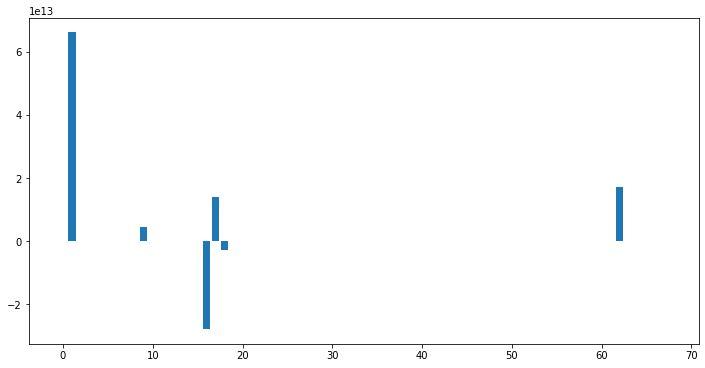

In [68]:
# summarize feature importance
indices = np.argsort(importance)[::-1]
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (test_data.columns[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()